# Algerian Forest Fires Dataset
## About Dataset
The dataset includes 244 instances that regroup data from two regions of Algeria, namely the Bejaia region, located in the northeast of Algeria and the Sidi Bel-Abbes region, located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attributes and 1 output attribute (class)
The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Algerian_forest_fires_dataset.csv",header=0)
df.head(5)


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


### Data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [4]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


#### AS there are two different region dataset we need to bring them on same table hence we add one mew column named "region"

In [5]:
df.loc[:122,"region"]=0
df.loc[122:,"region"]=1

In [6]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [7]:
df[['region']]=df[['region']].astype(int)

In [8]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
region         0
dtype: int64

In [9]:
df.dropna().reset_index(drop=True)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [10]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [11]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [12]:
df=df.drop(122).reset_index(drop=True)

In [13]:
df=df.drop(123).reset_index(drop=True)
df=df.drop(168).reset_index(drop=True)
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
region         0
dtype: int64

In [14]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
166,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [15]:
df=df.dropna()

In [16]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [17]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [18]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [19]:
df[['day','month','year','Temperature','RH','Ws']] = df[['day','month','year','Temperature','RH','Ws']].astype(int)
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']] = df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)


In [20]:
df.to_csv("Algerian_cleaned_dataset.csv")

## EDA

In [21]:
df_copy=df.drop(['day','month','year'],axis=1)

In [22]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [23]:
df_copy['Classes'] = df_copy['Classes'].str.strip().str.lower().replace({'not fire': 0, 'fire': 1}).astype(int)


C:\Users\yash patel\AppData\Local\Temp\ipykernel_29544\1222105083.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['Classes'] = df_copy['Classes'].str.strip().str.lower().replace({'not fire': 0, 'fire': 1}).astype(int)


In [24]:
df_copy['Classes'].value_counts()

Classes
1    136
0    106
Name: count, dtype: int64

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'region'}>]], dtype=object)

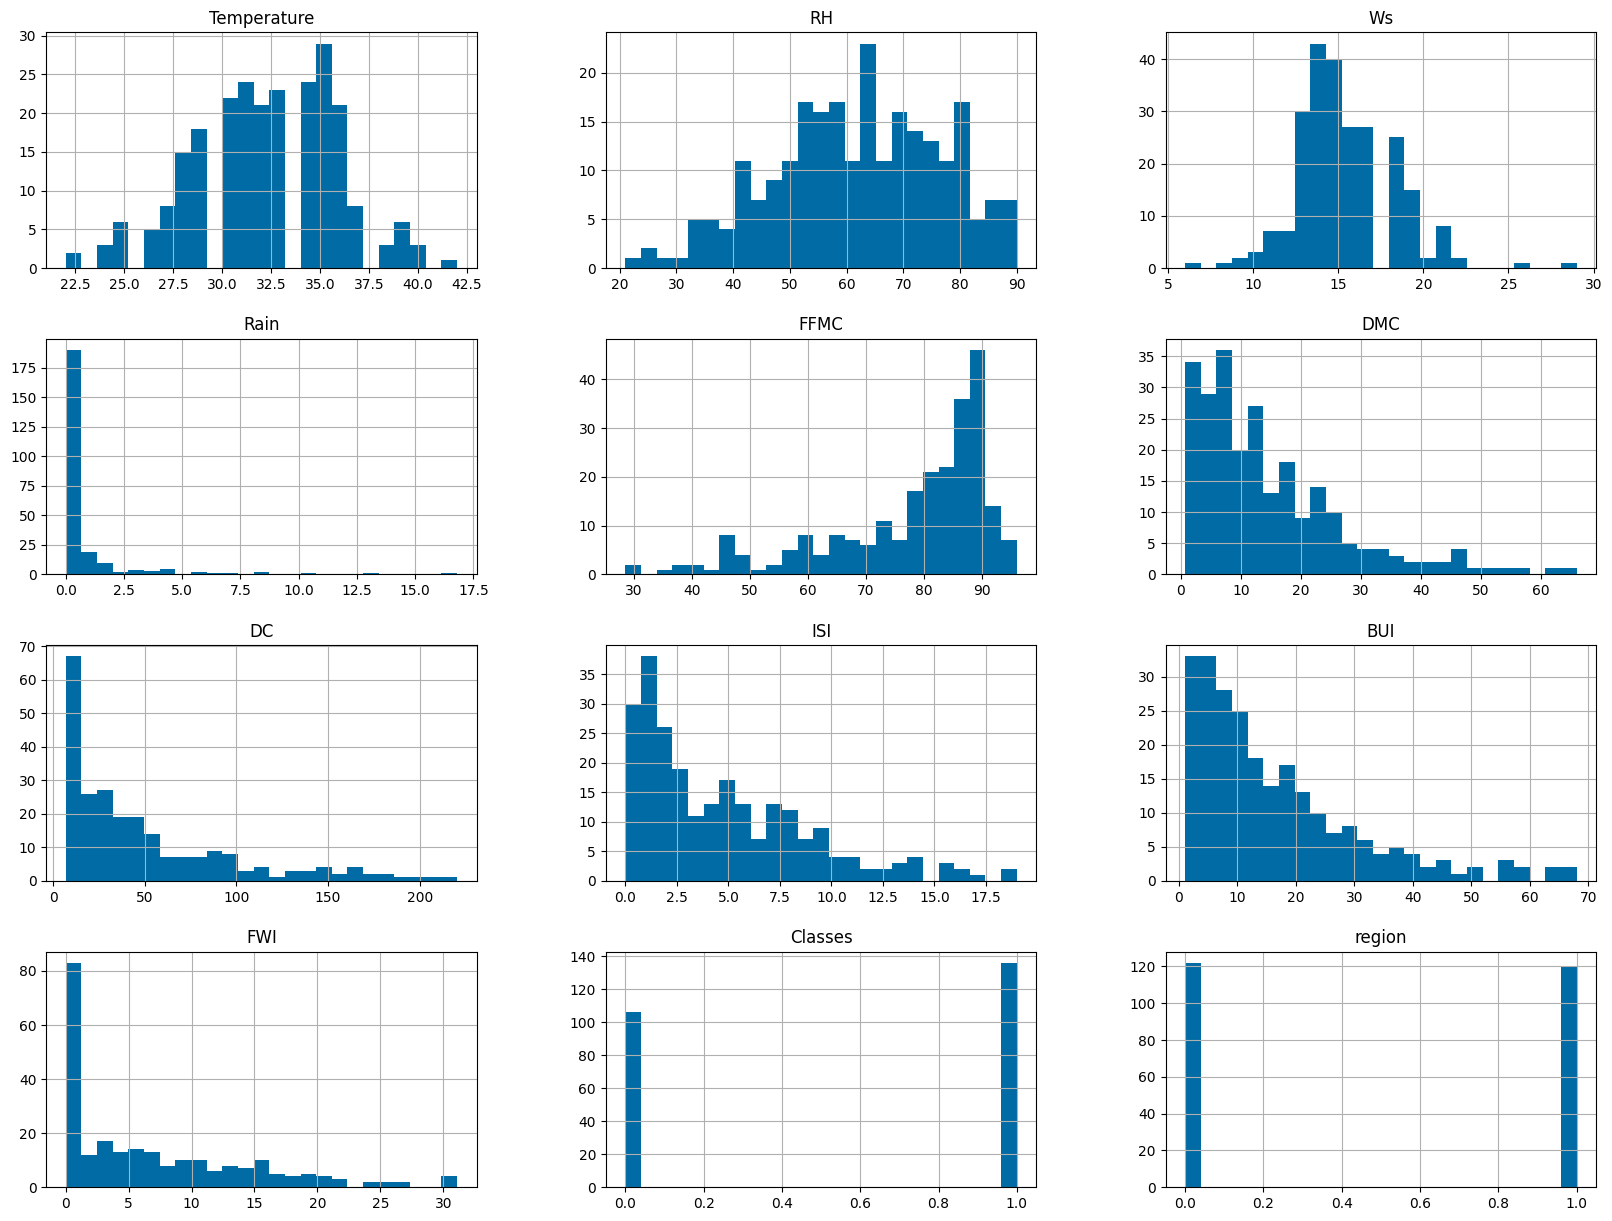

In [28]:
plt.style.use('tableau-colorblind10')
df_copy.hist(bins=25,figsize=(20,15))

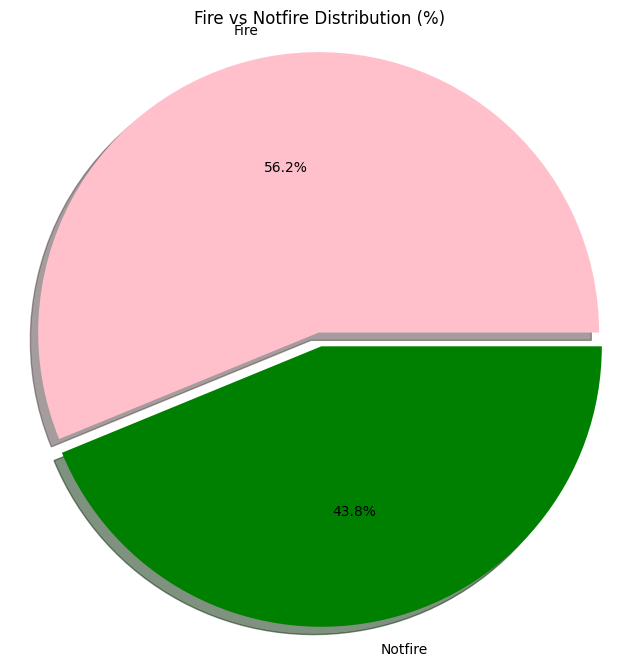

In [38]:
import matplotlib.pyplot as plt

percent = df_copy['Classes'].value_counts(normalize=True) * 100
classlabels = ["Fire", "Notfire"]
colors = ['pink', 'green']
explode = [0.05, 0]  # To visually "pull out" the first slice

plt.figure(figsize=(8, 8))
plt.pie(percent, labels=classlabels, shadow=True, colors=colors, explode=explode, autopct='%1.1f%%')
plt.title("Fire vs Notfire Distribution (%)")
plt.axis('equal')  # Keeps the pie chart circular
plt.show()


In [40]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.652383,-0.284032,-0.327161,0.677624,0.486437,0.376002,0.603984,0.460148,0.566837,0.518109,0.271499
RH,-0.652383,1.000000,0.242055,0.225594,-0.650586,-0.412590,-0.225925,-0.689471,-0.356378,-0.583591,-0.439837,-0.411120
Ws,-0.284032,0.242055,1.000000,0.172507,-0.167754,-0.001569,0.079963,0.008559,0.031067,0.032308,-0.072073,-0.183880
Rain,-0.327161,0.225594,0.172507,1.000000,-0.543579,-0.288345,-0.298727,-0.347605,-0.299682,-0.324464,-0.378429,-0.038521
FFMC,0.677624,-0.650586,-0.167754,-0.543579,1.000000,0.603326,0.508407,0.740357,0.591974,0.691374,0.769376,0.220871
DMC,0.486437,-0.412590,-0.001569,-0.288345,0.603326,1.000000,0.876943,0.680675,0.982329,0.876074,0.585383,0.190961
DC,0.376002,-0.225925,0.079963,-0.298727,0.508407,0.876943,1.000000,0.508753,0.942530,0.739753,0.513317,-0.077490
ISI,0.603984,-0.689471,0.008559,-0.347605,0.740357,0.680675,0.508753,1.000000,0.644142,0.922899,0.736413,0.263790
BUI,0.460148,-0.356378,0.031067,-0.299682,0.591974,0.982329,0.942530,0.644142,1.000000,0.858005,0.586974,0.088866
FWI,0.566837,-0.583591,0.032308,-0.324464,0.691374,0.876074,0.739753,0.922899,0.858005,1.000000,0.720241,0.197367


<Axes: >

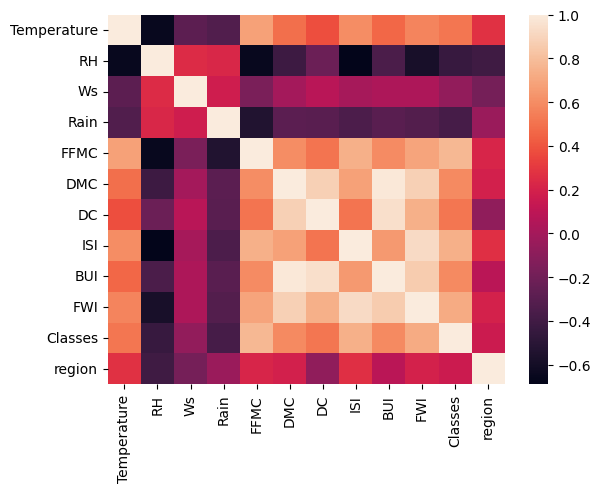

In [44]:
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

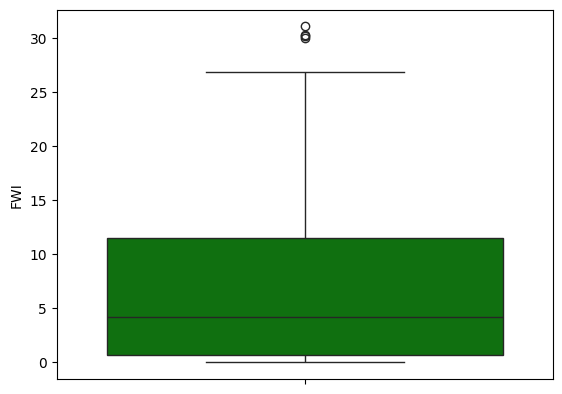

In [49]:
sns.boxplot(df_copy['FWI'],color='green')

C:\Users\yash patel\AppData\Local\Temp\ipykernel_29544\2324491149.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Classes'] = df['Classes'].str.strip().str.lower().replace({'not fire': 0, 'fire': 1}).astype(int)


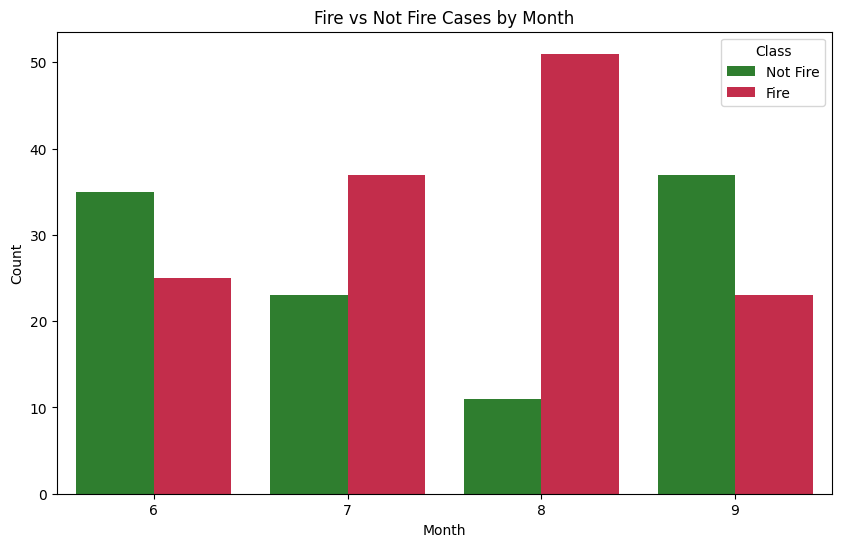

In [53]:
# Use df not df_copy, since df_copy dropped 'month'
df['Classes'] = df['Classes'].str.strip().str.lower().replace({'not fire': 0, 'fire': 1}).astype(int)

# Grouping by month and fire class
monthly_counts = df.groupby(['month', 'Classes']).size().reset_index(name='count')
monthly_counts['ClassLabel'] = monthly_counts['Classes'].map({1: 'Fire', 0: 'Not Fire'})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_counts, x='month', y='count', hue='ClassLabel', palette=['forestgreen', 'crimson'])
plt.title('Fire vs Not Fire Cases by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Class')